## Simple recommender system using Python

Suggests a movie that are most similar to your selected movie

[MovieLens Latest Dataset](https://grouplens.org/datasets/movielens/latest/)

### Import packages

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

### Load Data

In [5]:
# Get Movie Ratings Data
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Get Movie Titles Data
df_movies = pd.read_csv('data/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Merge Movie Ratings and Titles Dataframe
df = pd.merge(df_ratings, df_movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### Explaratory Data Analysis

In [8]:
# Number of Users
df['userId'].nunique()

610

In [9]:
# Number of Movies
df['movieId'].nunique()

9724

In [10]:
# Ratings
df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [11]:
# Movie Ratings
movies = df.groupby(by='title')

In [12]:
# Ratings average
movies['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [13]:
# Top 10 highest rated movies
movies['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [14]:
ratings = pd.DataFrame(movies['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [15]:
# Number of ratings
ratings['no_of_ratings'] = pd.DataFrame(movies['rating'].count())
ratings.head()

,rating,no_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


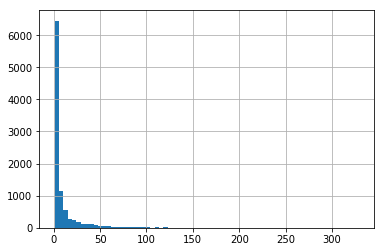

In [16]:
ratings['no_of_ratings'].hist(bins=70)

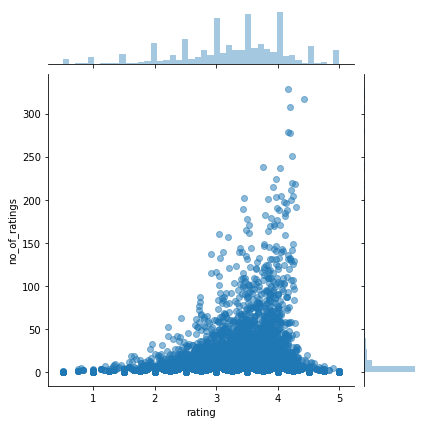

In [17]:
sns.jointplot(x='rating',y='no_of_ratings',data=ratings, alpha=0.5)

### Build the Item Similarity Recommender System

In [18]:
# Select the features
features = ['userId','movieId','title','rating']

df = df[features]

In [19]:
# Create Movie Matrix
movie_matrix = df.pivot_table(index='userId',columns='title',values='rating')

In [43]:
movie_matrix['Star Wars: Episode IV - A New Hope (1977)']

userId
1      5.0
2      NaN
3      NaN
4      5.0
5      NaN
6      NaN
7      5.0
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     5.0
16     3.0
17     5.0
18     4.0
19     4.0
20     NaN
21     4.5
22     NaN
23     NaN
24     NaN
25     5.0
26     NaN
27     4.0
28     4.0
29     NaN
30     5.0
      ... 
581    NaN
582    4.0
583    NaN
584    NaN
585    NaN
586    4.5
587    NaN
588    NaN
589    NaN
590    5.0
591    5.0
592    NaN
593    5.0
594    NaN
595    NaN
596    4.0
597    5.0
598    NaN
599    5.0
600    4.0
601    NaN
602    5.0
603    4.0
604    NaN
605    5.0
606    4.5
607    3.0
608    3.5
609    NaN
610    5.0
Name: Star Wars: Episode IV - A New Hope (1977), Length: 610, dtype: float64

In [21]:
ratings.sort_values('no_of_ratings', ascending=False).head(10)

,rating,no_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [22]:
forrestgump_user_ratings = movie_matrix['Forrest Gump (1994)']
starwars_user_ratings = movie_matrix['Star Wars: Episode IV - A New Hope (1977)']

In [38]:
forrestgump_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [24]:
starwars_user_ratings.head()

userId
1    5.0
2    NaN
3    NaN
4    5.0
5    NaN
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [25]:
# Correlation of other movies to Forrest Gump Movie
similar_to_forrestgump = movie_matrix.corrwith(forrestgump_user_ratings)


/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [26]:
similar_to_forrestgump[similar_to_forrestgump.notnull()]

title
'burbs, The (1989)                                        0.197712
(500) Days of Summer (2009)                               0.234095
*batteries not included (1987)                            0.892710
...And Justice for All (1979)                             0.928571
10 Cent Pistol (2015)                                    -1.000000
10 Cloverfield Lane (2016)                                0.752057
10 Items or Less (2006)                                  -1.000000
10 Things I Hate About You (1999)                         0.088009
10,000 BC (2008)                                         -0.143823
101 Dalmatians (1996)                                     0.381438
101 Dalmatians (One Hundred and One Dalmatians) (1961)    0.141023
102 Dalmatians (2000)                                    -0.857589
10th Kingdom, The (2000)                                  1.000000
11:14 (2003)                                              0.500000
12 Angry Men (1957)                                     

In [27]:
# Correlation of other movies to Star Wars
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [28]:
corr_forrestgump = pd.DataFrame(similar_to_forrestgump, columns=['Correlation'])
corr_forrestgump.dropna(inplace=True)

In [29]:
corr_forrestgump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [30]:
corr_forrestgump.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


In [31]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [32]:
corr_starwars.head()

,Correlation
title,
"'burbs, The (1989)",0.155161
(500) Days of Summer (2009),0.024299
*batteries not included (1987),-0.269069
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),0.360885


In [33]:
corr_forrestgump.sort_values('Correlation', ascending=True).head()

,Correlation
title,
Paper Clips (2004),-1.0
"Closet, The (Placard, Le) (2001)",-1.0
Coal Miner's Daughter (1980),-1.0
Gigi (1949),-1.0
Coffee Town (2013),-1.0


In [34]:
corr_forrestgump = corr_forrestgump.join(ratings['no_of_ratings'])
corr_forrestgump.head()

,Correlation,no_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [35]:
corr_forrestgump[corr_forrestgump['no_of_ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,no_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


In [36]:
corr_starwars = corr_starwars.join(ratings['no_of_ratings'])
corr_starwars.head()

,Correlation,no_of_ratings
title,,
"'burbs, The (1989)",0.155161,17
(500) Days of Summer (2009),0.024299,42
*batteries not included (1987),-0.269069,7
10 Cent Pistol (2015),1.000000,2
10 Cloverfield Lane (2016),0.360885,14


In [37]:
corr_starwars[corr_starwars['no_of_ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,no_of_ratings
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,251
Star Wars: Episode V - The Empire Strikes Back (1980),0.777970,211
Star Wars: Episode VI - Return of the Jedi (1983),0.734230,196
"Fugitive, The (1993)",0.482078,190
Indiana Jones and the Last Crusade (1989),0.410916,140
